<a href="https://colab.research.google.com/github/ShadaElewa/NFA-to-DFA/blob/main/compiler_final_practical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Shada Hazem Elewa
12200081 - level 3 - class 16
# 2-Sama Mahmoud Abdlbasset
12200353 - level 3 - class 16





# #Steps To Convert NFA To DFA
#-DYNAMIC

In [ ]:
import pandas as pd

# Function to run the DFA
def run_dfa(dfa, dfa_final_states, user_input):
    current_state = list(dfa.keys())[0]  # Start from the initial state

    for symbol in user_input:
        if symbol in dfa[current_state]:
            current_state = dfa[current_state][symbol]
        else:
            return False  # If there is no transition for the current symbol, the string is rejected

    return current_state in dfa_final_states

# Input NFA
nfa = {}
n = int(input("No. of states: "))
t = int(input("No. of transitions: "))
for i in range(n):
    state = input("State name: ")
    nfa[state] = {}
    for j in range(t):
        path = input("Path: ")
        print(f"Enter end state from state {state} traveling through path {path}: ")
        reaching_state = [x for x in input().split()]
        nfa[state][path] = reaching_state

# Print NFA
print("\nNFA:\n", nfa)
print("\nPrinting NFA table:")
nfa_table = pd.DataFrame(nfa)
print(nfa_table.transpose())

# Enter final state of NFA
nfa_final_state = [x for x in input("Enter final state of NFA: ").split()]

# Convert NFA to DFA
new_states_list = []
dfa = {}
keys_list = list(list(nfa.keys())[0])
path_list = list(nfa[keys_list[0]].keys())

dfa[keys_list[0]] = {}
for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])
    dfa[keys_list[0]][path_list[y]] = var
    if var not in keys_list:
        new_states_list.append(var)
        keys_list.append(var)

while len(new_states_list) != 0:
    dfa[new_states_list[0]] = {}
    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []
            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]
            s = "".join(temp)
            if s not in keys_list:
                new_states_list.append(s)
                keys_list.append(s)
            dfa[new_states_list[0]][path_list[i]] = s

    new_states_list.remove(new_states_list[0])

# Print DFA
print("\nDFA:\n", dfa)
print("\nPrinting DFA table:")
dfa_table = pd.DataFrame(dfa)
print(dfa_table.transpose())

# Determine final states of the DFA
dfa_states_list = list(dfa.keys())
dfa_final_states = []
for x in dfa_states_list:
    for i in x:
        if i in nfa_final_state:
            dfa_final_states.append(x)
            break

print("\nFinal states of the DFA are:", dfa_final_states)

# Let the user enter optimal solutions
while True:
    user_input = input("Enter a string to check acceptance by the DFA (press 'Esc' to exit): ")

    if user_input.lower() == 'esc':
        break

    if run_dfa(dfa, dfa_final_states, user_input):
        print(f"The string '{user_input}' is accepted by the DFA.")
    else:
        print(f"The string '{user_input}' is rejected by the DFA.")


No. of states: 4
No. of transitions: 2
State name: 1
Path: a
Enter end state from state 1 traveling through path a: 
1 2 3
Path: b
Enter end state from state 1 traveling through path b: 
4
State name: 2
Path: a
Enter end state from state 2 traveling through path a: 

Path: b
Enter end state from state 2 traveling through path b: 
3
State name: 3
Path: a
Enter end state from state 3 traveling through path a: 

Path: b
Enter end state from state 3 traveling through path b: 
2
State name: 4
Path: a
Enter end state from state 4 traveling through path a: 
3
Path: b
Enter end state from state 4 traveling through path b: 


NFA:
 {'1': {'a': ['1', '2', '3'], 'b': ['4']}, '2': {'a': [], 'b': ['3']}, '3': {'a': [], 'b': ['2']}, '4': {'a': ['3'], 'b': []}}

Printing NFA table:
           a    b
1  [1, 2, 3]  [4]
2         []  [3]
3         []  [2]
4        [3]   []
Enter final state of NFA: 3

DFA:
 {'1': {'a': '123', 'b': '4'}, '123': {'a': '123', 'b': '432'}, '4': {'a': '3', 'b': ''}, '432': {

#STATIC

In [20]:
import pandas as pd

# Function to run the DFA
def run_dfa(dfa, dfa_final_states, user_input):
    current_state = list(dfa.keys())[0]  # Start from the initial state

    for symbol in user_input:
        if symbol in dfa[current_state]:
            current_state = dfa[current_state][symbol]
        else:
            return False  # If there is no transition for the current symbol, the string is rejected

    return current_state in dfa_final_states

# Given NFA
nfa = {
    '1': {'a': ['1', '2', '3'], 'b': ['4']},
    '2': {'a': [], 'b': ['3']},
    '3': {'a': [], 'b': ['2']},
    '4': {'a': ['3'], 'b': []}
}

# Given final state of NFA
nfa_final_state = ['3']

# Convert NFA to DFA
new_states_list = []
dfa = {}
keys_list = list(list(nfa.keys())[0])
path_list = list(nfa[keys_list[0]].keys())

dfa[keys_list[0]] = {}
for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])
    dfa[keys_list[0]][path_list[y]] = var
    if var not in keys_list:
        new_states_list.append(var)
        keys_list.append(var)

while len(new_states_list) != 0:
    dfa[new_states_list[0]] = {}
    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []
            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]
            s = "".join(temp)
            if s not in keys_list:
                new_states_list.append(s)
                keys_list.append(s)
            dfa[new_states_list[0]][path_list[i]] = s

    new_states_list.remove(new_states_list[0])

# Print DFA
print("\nDFA:\n", dfa)
print("\nPrinting DFA table:")
dfa_table = pd.DataFrame(dfa)
print(dfa_table.transpose())

# Determine final states of the DFA
dfa_states_list = list(dfa.keys())
dfa_final_states = []
for x in dfa_states_list:
    for i in x:
        if i in nfa_final_state:
            dfa_final_states.append(x)
            break

print("\nFinal states of the DFA are:", dfa_final_states)

# Let the user enter optimal solutions
while True:
    user_input = input("Enter a string to check acceptance by the DFA (press 'Esc' to exit): ")

    if user_input.lower() == 'esc':
        break

    if run_dfa(dfa, dfa_final_states, user_input):
        print(f"The string '{user_input}' is accepted by the DFA.")
    else:
        print(f"The string '{user_input}' is rejected by the DFA.")



DFA:
 {'1': {'a': '123', 'b': '4'}, '123': {'a': '123', 'b': '432'}, '4': {'a': '3', 'b': ''}, '432': {'a': '3', 'b': '23'}, '3': {'a': '', 'b': '2'}, '': {}, '23': {'a': '', 'b': '32'}, '2': {'a': '', 'b': '3'}, '32': {'a': '', 'b': '23'}}

Printing DFA table:
       a    b
1    123    4
123  123  432
4      3     
432    3   23
3           2
     NaN  NaN
23         32
2           3
32         23

Final states of the DFA are: ['123', '432', '3', '23', '32']
Enter a string to check acceptance by the DFA (press 'Esc' to exit): ba
The string 'ba' is accepted by the DFA.
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aabb
The string 'aabb' is accepted by the DFA.
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaaaaaaaaaaaaaaaaab
The string 'aaaaaaaaaaaaaaaaaab' is accepted by the DFA.
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaaaaaa
The string 'aaaaaaa' is accepted by the DFA.
Enter a string to check acceptance by t

Enter a string to check acceptance by the DFA (press 'Esc' to exit): ba
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaaaaaaaab
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaababab
Enter a string to check acceptance by the DFA (press 'Esc' to exit): abbbb
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaaa\
Enter a string to check acceptance by the DFA (press 'Esc' to exit): aaaa
Enter a string to check acceptance by the DFA (press 'Esc' to exit): Esc


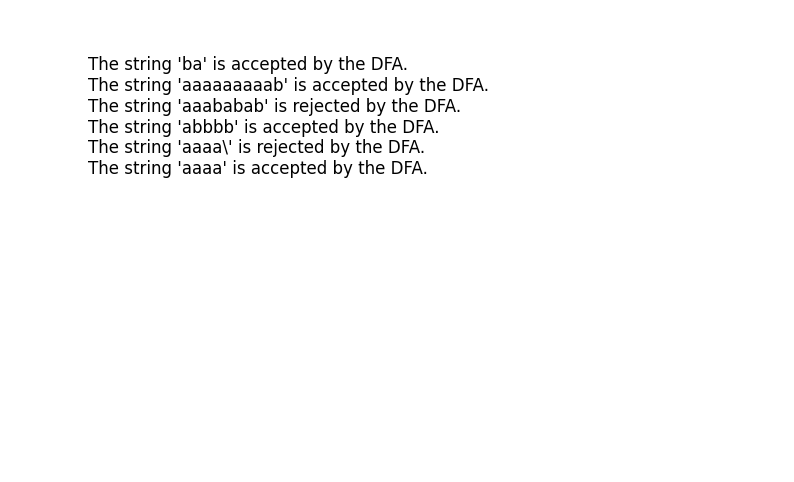

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to run the DFA
def run_dfa(dfa, dfa_final_states, user_input):
    current_state = list(dfa.keys())[0]  # Start from the initial state

    for symbol in user_input:
        if symbol in dfa[current_state]:
            current_state = dfa[current_state][symbol]
        else:
            return False  # If there is no transition for the current symbol, the string is rejected

    return current_state in dfa_final_states

# Given NFA
nfa = {
    '1': {'a': ['1', '2', '3'], 'b': ['4']},
    '2': {'a': [], 'b': ['3']},
    '3': {'a': [], 'b': ['2']},
    '4': {'a': ['3'], 'b': []}
}

# Given final state of NFA
nfa_final_state = ['3']

# Convert NFA to DFA
new_states_list = []
dfa = {}
keys_list = list(list(nfa.keys())[0])
path_list = list(nfa[keys_list[0]].keys())

dfa[keys_list[0]] = {}
for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])
    dfa[keys_list[0]][path_list[y]] = var
    if var not in keys_list:
        new_states_list.append(var)
        keys_list.append(var)

while len(new_states_list) != 0:
    dfa[new_states_list[0]] = {}
    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []
            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]
            s = "".join(temp)
            if s not in keys_list:
                new_states_list.append(s)
                keys_list.append(s)
            dfa[new_states_list[0]][path_list[i]] = s

    new_states_list.remove(new_states_list[0])

# Determine final states of the DFA
dfa_states_list = list(dfa.keys())
dfa_final_states = []
for x in dfa_states_list:
    for i in x:
        if i in nfa_final_state:
            dfa_final_states.append(x)
            break

# Let the user enter optimal solutions
output_text = ""
while True:
    user_input = input("Enter a string to check acceptance by the DFA (press 'Esc' to exit): ")

    if user_input.lower() == 'esc':
        break

    if run_dfa(dfa, dfa_final_states, user_input):
        output_text += f"The string '{user_input}' is accepted by the DFA.\n"
    else:
        output_text += f"The string '{user_input}' is rejected by the DFA.\n"

# Create a white figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')  # Set background color to white

# Hide the axes
ax.axis('off')

# Add the text to the figure
ax.text(0.1, 0.9, output_text, fontsize=12, color='black', verticalalignment='top')

# Show the figure
plt.show()
